In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
import numpy as np

%matplotlib inline

In [2]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#1. cp:chest pain, Value 1: atypical angina:chest pain not related to heart -> Value 2: non-anginal pain: typically esophageal spasms (non heart related -> Value 3:asymptomatic: chest pain not showing signs of disease

#2. trestbps: resting bp
#3. fbs:fasting blood sugar
#4. chol: cholesterol 

#5. restecg: Resting electrocardiographic measurement , -> 0 = normal (Nothing to note)
#-> 1 = having ST-T wave abnormality
#   - can range from mild symptoms to severe problems
#    - signals non-normal heart beat
#-> 2 = showing probable or definite left ventricular hypertrophy by
#   Estes' criteria

#6. thalach: The person's maximum heart rate achieved

#7. exang: Exercise induced angina (1 = yes; 0 = no)

#10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

#11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

#12.ca: The number of major vessels (0-3)

#-> colored vessel means the doctor can see the blood passing through
#-> the more blood movement the better (no clots)

#13.thal: A blood disorder called thalassemia -> 1,3 = normal -> 6 = fixed defect:used to be defect but ok now -> 7 = reversable defect:no proper blood movement when excercising

#14.target: Heart disease (0 = no, 1 = yes) = the predicted attribute

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape


(303, 14)

In [8]:
pd.set_option('display.float','{:.2f}'.format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [9]:
!pip install pandas-profiling

In [10]:
import pandas_profiling
x=pandas_profiling.ProfileReport(df)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


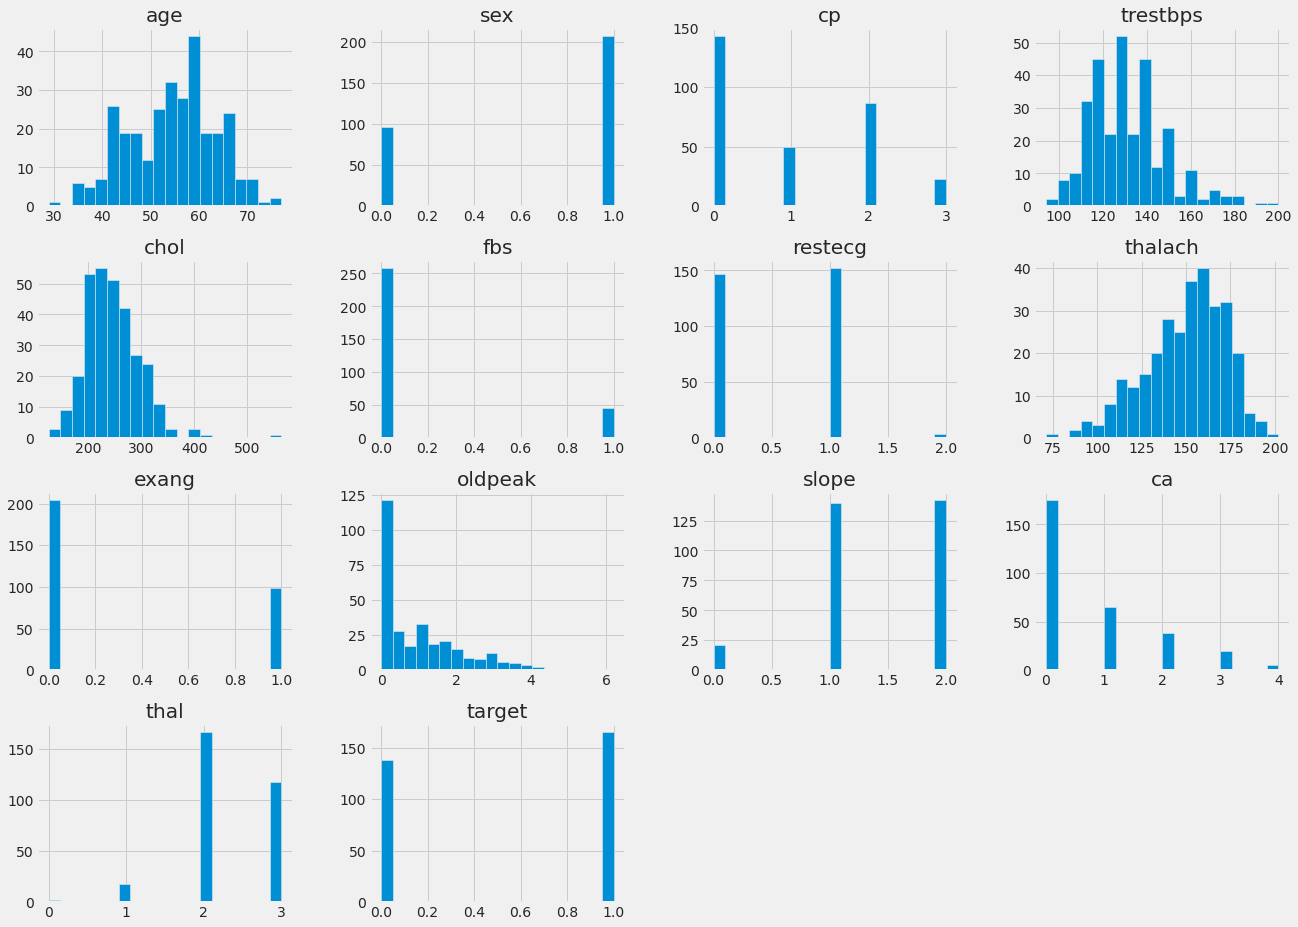

In [11]:
# Data Visualization
df.hist(bins=20,figsize=(20,15))
df
# or plt.show()

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
#or
df.isnull().count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

<AxesSubplot:>

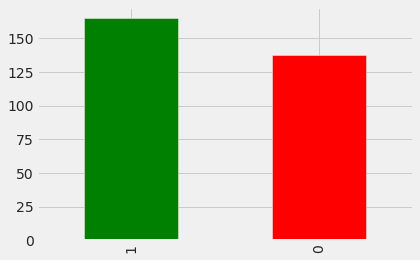

In [14]:
# The Target
df.target.value_counts().plot(kind='bar',color=['g','r'])

In [15]:
categorical_val=[]
continuous_val=[]
for column in df.columns:
    print('************************************************')
    print(f'{column}:{df[column].unique()}')
    if len(df[column].unique())<=10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

************************************************
age:[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
************************************************
sex:[1 0]
************************************************
cp:[3 2 1 0]
************************************************
trestbps:[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
************************************************
chol:[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 17

In [16]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

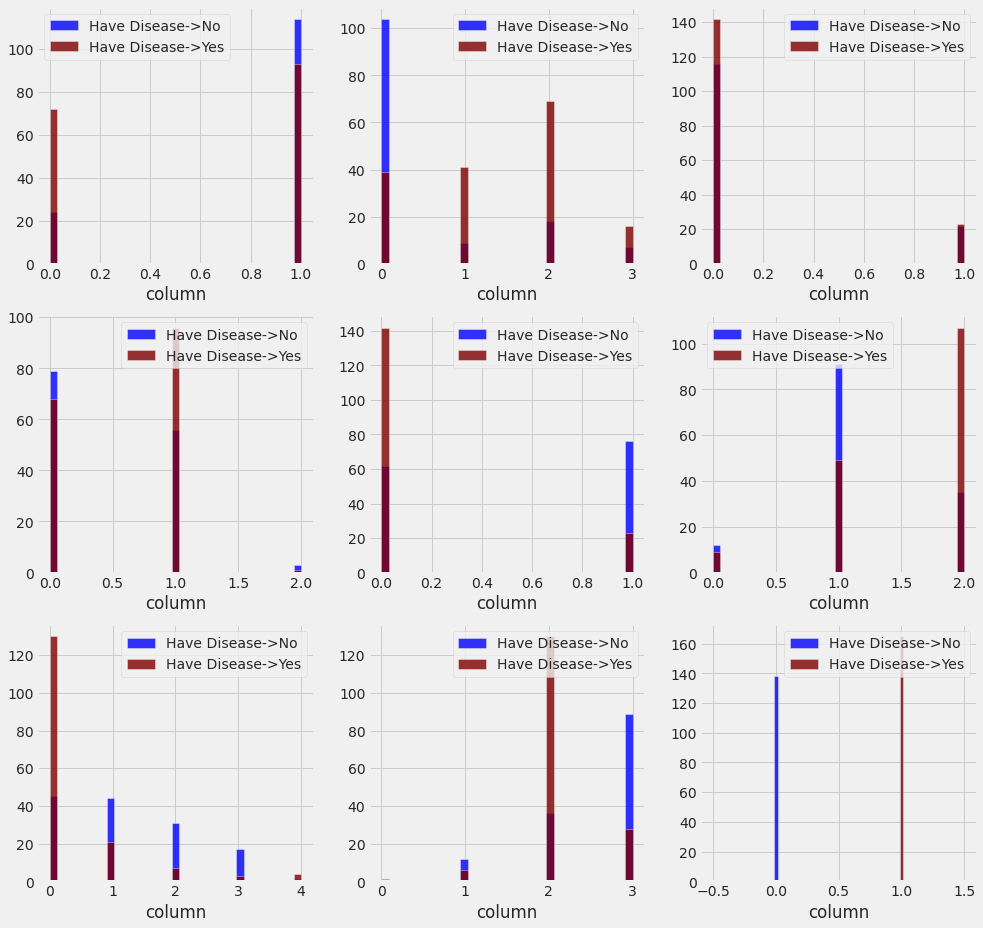

In [17]:
plt.figure(figsize=(15,15))
for i,column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    df[df['target']==0][column].hist(bins=35,color='blue',label='Have Disease->No',alpha=0.8)
    df[df['target']==1][column].hist(bins=35,color="maroon",label="Have Disease->Yes",alpha=0.8)
    plt.legend()
    plt.xlabel('column')
    #alpha is for brightness of color

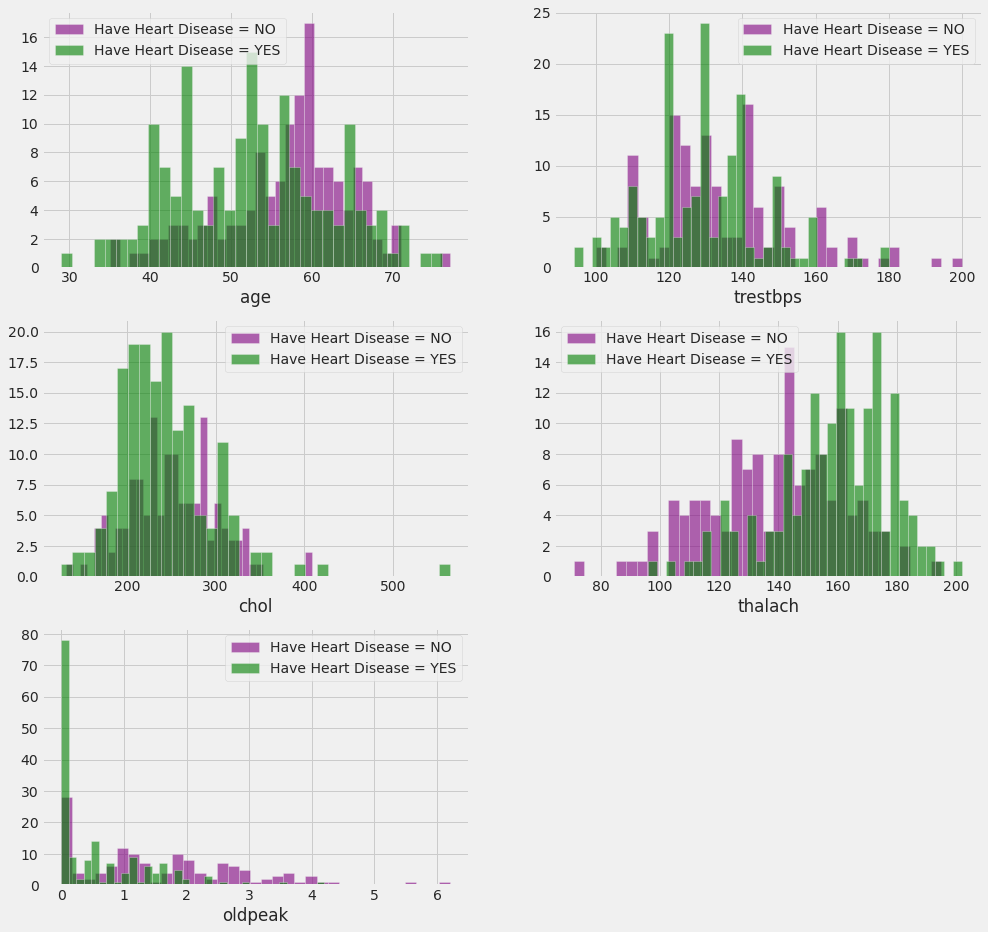

In [18]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continuous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='purple', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='green', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column )

In [19]:
# Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


(14.5, -0.5)

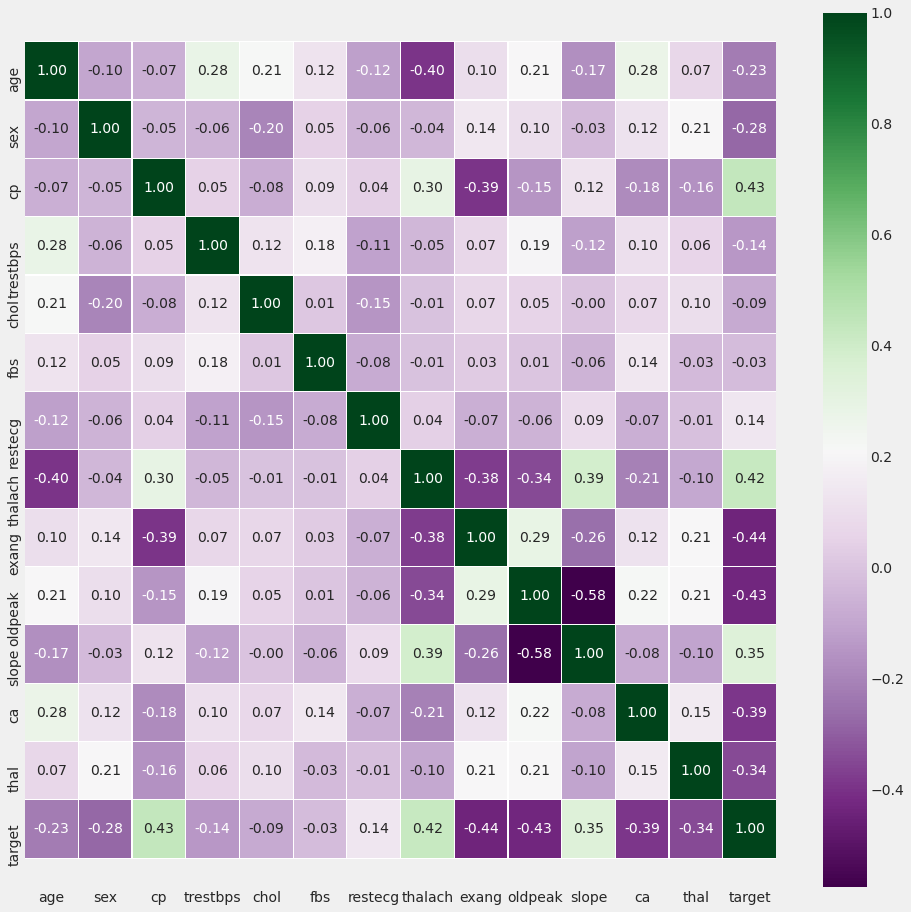

In [20]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.2,fmt='.2f',cmap='PRGn')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
# if annot=False ,then data won't print

In [21]:
#data processing
categorical_val.remove('target')
dataset=pd.get_dummies(df,columns=categorical_val)


In [22]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [23]:
print(df.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
MinMax_sc=MinMaxScaler(feature_range=(0,1))
col_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale]=MinMax_sc.fit_transform(dataset[col_to_scale])

In [26]:

dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.71,0.48,0.24,0.60,0.37,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.17,0.34,0.28,0.89,0.56,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.25,0.34,0.18,0.77,0.23,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.56,0.25,0.25,0.82,0.13,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.58,0.25,0.52,0.70,0.10,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("\nTrain Result:\n================================================\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("\nTest Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [28]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_test.index

Int64Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45,
            175, 118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283,
            254,  73, 231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,
             57,  92,  77, 137, 116,   7, 251, 281,  78, 292, 232, 219, 255,
             63,  82, 236, 204, 249, 104, 300, 193, 184, 132, 202, 196,  75,
            176,  59,  93,   6, 177,  30,  22, 258,  56, 242, 114, 287, 282,
            197, 158, 164, 244,  84,  66, 113, 167, 250,  19, 143,  79, 144],
           dtype='int64')

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 87.74%
_______________________________________________
Classification Report:	Precision Score: 88.03%
			Recall Score: 89.57%
			F1 score: 88.79%
_______________________________________________
Confusion Matrix: 
 [[ 83  14]
 [ 12 103]]


Test Result:
Accuracy Score: 81.32%
_______________________________________________
Classification Report:	Precision Score: 82.35%
			Recall Score: 84.00%
			F1 score: 83.17%
_______________________________________________
Confusion Matrix: 
 [[32  9]
 [ 8 42]]



In [32]:
train_score=accuracy_score(y_train,log_reg.predict(X_train))
test_score=accuracy_score(y_test,log_reg.predict(X_test))

In [33]:
result_df=pd.DataFrame(data=[['Logistic Regression',train_score,test_score]],columns=['Model','Training Accuracy %',"Testing Accuracy %"])
result_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,0.88,0.81


In [34]:
## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
print_score(knn_classifier,X_train,y_train,X_test,y_test,train=True)
print_score(knn_classifier,X_train,y_train,X_test,y_test,train=False)


Train Result:

Accuracy Score: 89.62%
_______________________________________________
Classification Report:	Precision Score: 90.43%
			Recall Score: 90.43%
			F1 score: 90.43%
_______________________________________________
Confusion Matrix: 
 [[ 86  11]
 [ 11 104]]


Test Result:
Accuracy Score: 81.32%
_______________________________________________
Classification Report:	Precision Score: 82.35%
			Recall Score: 84.00%
			F1 score: 83.17%
_______________________________________________
Confusion Matrix: 
 [[32  9]
 [ 8 42]]



In [37]:
train_score=accuracy_score(y_train,knn_classifier.predict(X_train))

test_score=accuracy_score(y_test,knn_classifier.predict(X_test))

In [38]:
result_df_1=pd.DataFrame([['KNN',train_score,test_score]],columns=['Model','Training Accuracy %','Testing Accuracy %'])
result_df=result_df.append(result_df_1,ignore_index=True)
result_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,0.88,0.81
1,KNN,0.90,0.81


In [39]:
#svm

In [40]:
from sklearn.svm import SVC
svm_model=SVC(kernel='rbf',gamma=0.1,C=1.0)
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
print_score(svm_model,X_train,y_train,X_test,y_test,train=True)
print_score(svm_model,X_train,y_train,X_test,y_test,train=False)


Train Result:

Accuracy Score: 89.15%
_______________________________________________
Classification Report:	Precision Score: 88.98%
			Recall Score: 91.30%
			F1 score: 90.13%
_______________________________________________
Confusion Matrix: 
 [[ 84  13]
 [ 10 105]]


Test Result:
Accuracy Score: 85.71%
_______________________________________________
Classification Report:	Precision Score: 84.91%
			Recall Score: 90.00%
			F1 score: 87.38%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 5 45]]



In [42]:
train_score=accuracy_score(y_train,svm_model.predict(X_train))
test_score=accuracy_score(y_test,svm_model.predict(X_test))

In [43]:
result_df_2=pd.DataFrame(data=[['svm',train_score,test_score]],columns=['Model','Training Accuracy %','Testing Accuracy %'])
result_df=result_df.append(result_df_2,ignore_index=True)
result_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,0.88,0.81
1,KNN,0.90,0.81
2,svm,0.89,0.86


In [44]:
result_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,0.88,0.81
1,KNN,0.90,0.81
2,svm,0.89,0.86


In [45]:
# to remove if list appended more than once by mistake
#result_df.drop(result_df.tail(1).index,inplace=True)

In [46]:
# decision tree classifier


In [47]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]


Test Result:
Accuracy Score: 78.02%
_______________________________________________
Classification Report:	Precision Score: 84.09%
			Recall Score: 74.00%
			F1 score: 78.72%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [13 37]]



In [48]:
test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

result_df_3 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
result_df = result_df.append(result_df_3, ignore_index=True)
result_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,0.88,0.81
1,KNN,0.90,0.81
2,svm,0.89,0.86
3,Decision Tree Classifier,100.00,78.02


In [49]:
# Random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [51]:
random_forest=RandomForestClassifier(n_estimators=1000,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [52]:
print_score(random_forest, X_train, y_train, X_test, y_test, train=True)
print_score(random_forest, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]


Test Result:
Accuracy Score: 82.42%
_______________________________________________
Classification Report:	Precision Score: 84.00%
			Recall Score: 84.00%
			F1 score: 84.00%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



In [53]:
test_score = accuracy_score(y_test, random_forest.predict(X_test)) * 100
train_score = accuracy_score(y_train, random_forest.predict(X_train)) * 100

result_df_4 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
result_df = result_df.append(result_df_4, ignore_index=True)
result_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,0.88,0.81
1,KNN,0.90,0.81
2,svm,0.89,0.86
3,Decision Tree Classifier,100.00,78.02
4,Random Forest Classifier,100.00,82.42


In [54]:
#  Logistic Regression Hyperparameter Tuning


In [57]:
from sklearn.model_selection import GridSearchCV

In [59]:
np.logspace??


In [65]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

log_reg = LogisticRegression()

grid_search_cv = GridSearchCV(log_reg, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.4s finished
/home/uddeshya/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-0...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [66]:
grid_search_cv.best_estimator_

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
log_reg=LogisticRegression(C=0.08858667904100823, 
                             solver='liblinear')
log_reg.fit(X_train,y_train)
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 87.18%
			Recall Score: 88.70%
			F1 score: 87.93%
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]


Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 85.71%
			Recall Score: 84.00%
			F1 score: 84.85%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 8 42]]



In [68]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.79,83.52


In [70]:
log_proba=pd.DataFrame(log_reg.predict_proba(X_test))
log_proba.index=X_test.index
log_proba.head()

,0,1
179,0.90,0.10
228,0.55,0.45
111,0.44,0.56
246,0.90,0.10
60,0.19,0.81
